In [2]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score, fbeta_score, precision_score, recall_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import multilabel_confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics.pairwise import cosine_similarity
from skmultilearn.adapt import MLkNN
from sklearn.linear_model import LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier
from sklearn.multioutput import ClassifierChain
from sklearn.ensemble import AdaBoostClassifier 

import pandas as pd
import json
import os
import re

import pickle
import nltk
from nltk.tokenize import word_tokenize

import gensim 
from gensim.models import Word2Vec
import gensim.downloader


import spacy
import matplotlib
import plotly.express as px
import plotly.subplots as sp
from plotly.subplots import make_subplots
from ast import literal_eval
from tqdm import tqdm

import sklearn.metrics
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn')

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /homes/lgf21/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
tqdm.pandas()

# Opening Files: 

In [17]:
model = Word2Vec.load("word2vec.model").wv

In [6]:
data = '../src/scraping/technique_dataset.json'
with open(data) as file:
    open_data = json.load(file)

# Converting to Data Frames: 
    
description_text = pd.Series([x['Description'][0] for x in open_data.values()])


In [62]:
# Open Pickle for training set: 
with open('train_text.pickle', 'rb') as handle:
    training = pickle.load(handle)

In [23]:
# function to implement embedding for training and description: 

average=True
def get_embeddings(sent):
    # if text not in vocab:
    words_in_vocab = [word for word in sent if word in model]
    if not words_in_vocab:
        return np.zeros_like(model['the'])
    emb = model[words_in_vocab]
    return np.mean(emb, axis=0) if average else np.sum(emb, axis=0)

#perform tokenisation
#X_train = pd.DataFrame(training.progress_apply(nltk.word_tokenize).progress_apply(get_embeddings).values.tolist())
descriptions = pd.DataFrame(description_text.progress_apply(nltk.word_tokenize).progress_apply(get_embeddings).values.tolist())


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 269/269 [00:00<00:00, 6038.10it/s]


In [63]:
#tokenize training set: 

report_sents = []
reports = []
for i in tqdm(range(len(training))):
    sents = pd.Series(training.apply(nltk.sent_tokenize).iloc[i])
    report_sents.append(sents)
    reports.append(pd.DataFrame(sents.apply(nltk.word_tokenize).apply(get_embeddings).values.tolist()))
    

  0%|▏                                                                                                               | 3/2267 [00:08<1:52:31,  2.98s/it]


KeyboardInterrupt: 

In [82]:
similarities = cosine_similarity(descriptions, descriptions)

In [72]:
[(i, t) for i, t in enumerate(y.columns) if int(y.loc[1, t])==1]

[(26, 'T1192'), (97, 'T1193'), (125, 'T1204'), (180, 'T1194')]

In [41]:
import seaborn as sns

<AxesSubplot:>

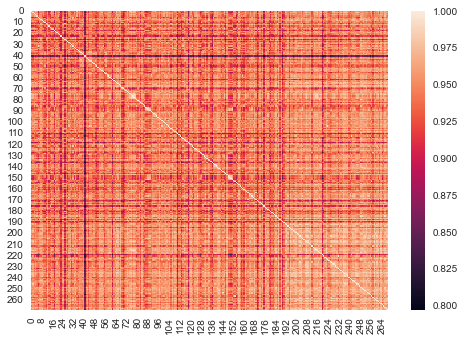

In [83]:
sns.heatmap(similarities[:])

In [80]:
sentence_output = []

for i, s in enumerate(similarities[:,26]):
    if s> 0.9:
        print('\n\n------------------------------\n\n')
        print(i, s, '\n\n')
        print(report_sents[1][i])
        sentence_output.append(s) # retrieve all the sentences with similarity
        



------------------------------


4 0.91064286 


Further analysis revealed a well-established collection of fake social media profiles that appear intended to build trust and rapport with potential victims.


------------------------------


5 0.90187806 


The connections associated with these profiles indicate the threat actor began using the persona to target organizations in April 2016.


------------------------------


7 0.90206563 


COBALT GYPSY has used spearphishing to target telecommunications, government, defense, oil, and financial services organizations based in or affiliated with the MENA region, identifying individual victims through social media sites.


------------------------------


8 0.912986 


Key points CTU researchers assess it highly likely that the Mia Ash persona is a fake identity used to perform reconnaissance on and establish relationships with employees of targeted organizations.


------------------------------


15 0.9170708 


If installed, PupyRAT

In [78]:
open_data['T1192']['Description'][0]

KeyError: 'T1192'

In [49]:
# Open Pickle for training set: 
with open('technique_y_train.pickle', 'rb') as handle:
    y = pickle.load(handle)